In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import dtale
#import streamlit as st
import mitosheet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
import scikitplot as skplt
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier

In [125]:
# IMPORTAMOS EL DATASET
df = pd.read_csv('/Users/gala/Desktop/Airlines/Aerolinea_equipo_4_Gala/Data/airline_passenger_satisfaction.csv')

# HEAD PARA VER LAS PRIMERAS FILAS
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Género: Género de los pasajeros (Mujer, Hombre)

Tipo de cliente: el tipo de cliente (cliente leal, cliente desleal)

Edad: La edad real de los pasajeros.

Tipo de Viaje: Propósito del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)

Clase: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)

Distancia de vuelo: la distancia de vuelo de este viaje.

Servicio wifi a bordo: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)

Hora de salida/llegada conveniente: Nivel de satisfacción de la hora de salida/llegada conveniente

Facilidad de reserva en línea: nivel de satisfacción de la reserva en línea

Ubicación de la puerta: Nivel de satisfacción de la ubicación de la puerta

Comida y bebida: Nivel de satisfacción de Comida y bebida

Embarque online: Nivel de satisfacción del embarque online

Confort del asiento: Nivel de satisfacción del confort del asiento

Entretenimiento a bordo: Nivel de satisfacción del entretenimiento a bordo

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Servicio de habitaciones para piernas: Nivel de satisfacción del servicio de habitaciones para piernas

Manejo de equipaje: Nivel de satisfacción en el manejo de equipaje

Servicio de Check-in: Nivel de satisfacción del servicio de Check-in

Servicio a bordo: Nivel de satisfacción del servicio a bordo

Limpieza: Nivel de satisfacción de la Limpieza

Retraso de salida en minutos: Minutos de retraso a la salida

Retraso de llegada en minutos: Minutos de retraso cuando llega

Satisfacción: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)

In [126]:
# VEMOS LA INFORMACIÓN DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [127]:
# VEMOS EL TAMAÑO DEL DATASET
df.shape

(103904, 25)

In [128]:
# LA CANTIDAD DE NULOS POR COLUMNA
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## PODEMOS VER QUE LA UNICA COL QUE TIENE NULOS ES LA COLUMNA DE Arrival Delay in Minutes 

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

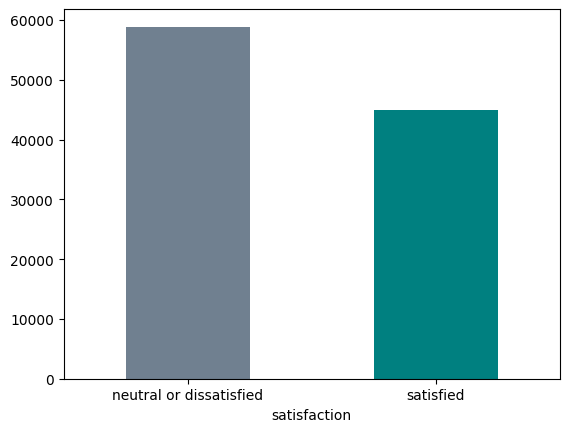

In [16]:
# GRAFICAMOS LA COL SATISFACTION
df['satisfaction'].value_counts(normalize = True)*100
df['satisfaction'].value_counts().plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)

PODEMOS CONCLUIR CON LO SIGUIENTE :    
El 43,33% de los pasajeros están satisfechos con los servicios de la aerolínea.   
El 56,67% de los pasajeros se muestran neutrales o insatisfechos con los servicios de las aerolíneas

/Users/gala/Desktop/Airlines/Aerolinea_equipo_4_Gala/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



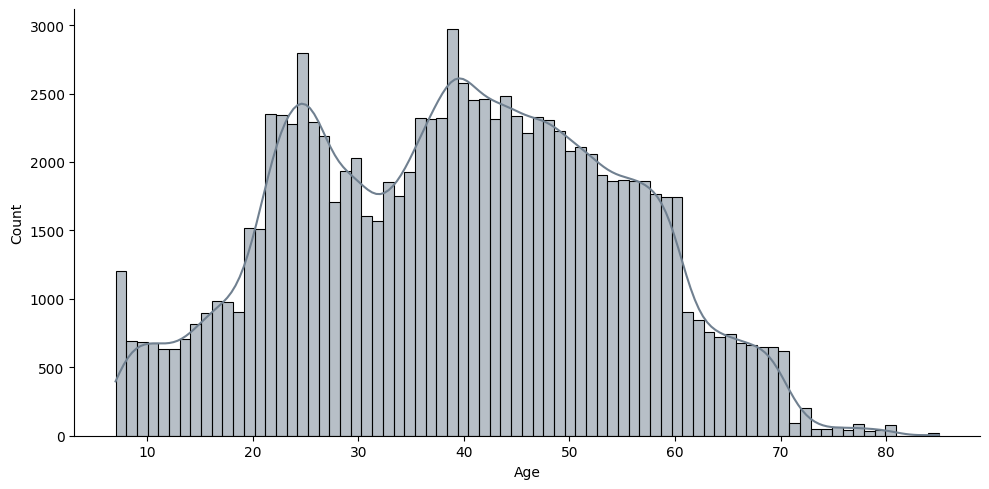

In [17]:
# GRAFICAMOS LA COL EDAD
sns.displot(df['Age'],kde=True,aspect=2,color='slategray')

PODEMOS VER QUE  :  
Más de 2.000 pasajeros tienen edades comprendidas entre 23 y 27 años y entre 35 y 45 años

/var/folders/qy/0fxt7g1n1gn1_w5fycv4s7800000gq/T/ipykernel_3854/1552480677.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/qy/0fxt7g1n1gn1_w5fycv4s7800000gq/T/ipykernel_3854/1552480677.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




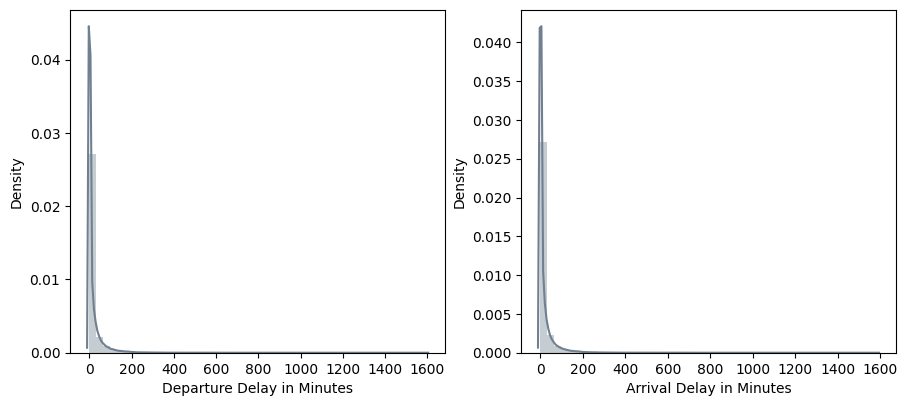

In [18]:
# GRAFICAMOS LA COL DE MINUTOS DE RETRASO
plt.figure(1,figsize=(9,4))
plt.subplot(121)
sns.distplot(df['Departure Delay in Minutes'],color='slategray')
plt.subplot(122)
sns.distplot(df['Arrival Delay in Minutes'],color='slategray')
plt.tight_layout(pad=0.5)

Text(0, 0.5, 'Ratio')

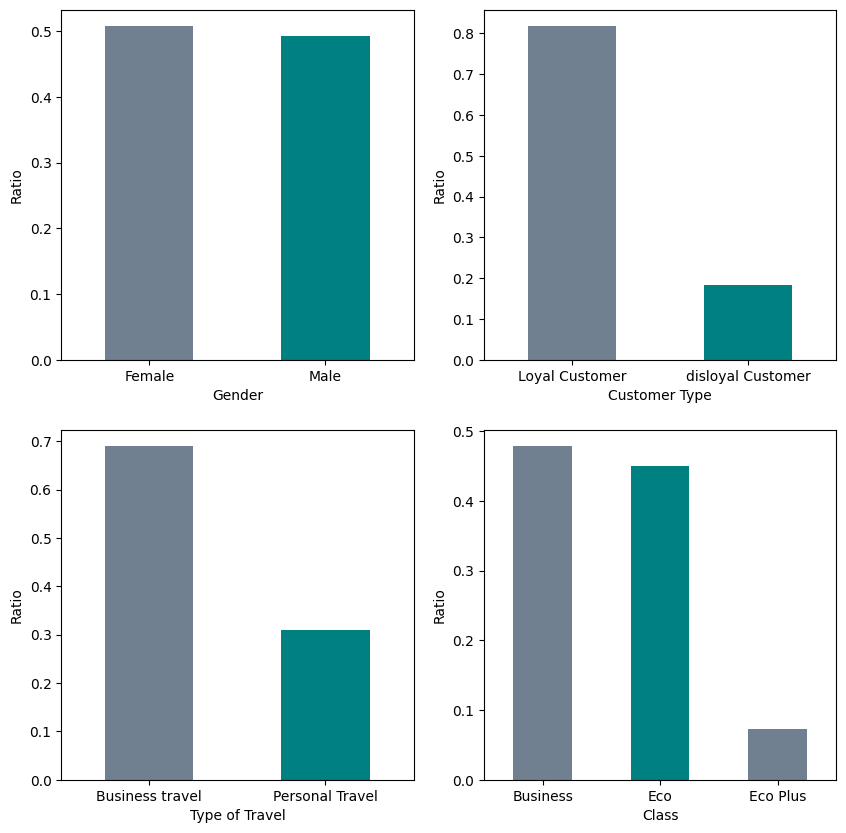

In [19]:
# GRAFICA DE GENERO, TIPO DE CLIENTE, TIPO DE VIAJE Y CLASE
plt.figure(1,figsize=(10,10))
plt.subplot(221)
df['Gender'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Ratio')

plt.subplot(222)
df['Customer Type'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Customer Type')
plt.ylabel('Ratio')

plt.subplot(223)
df['Type of Travel'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Type of Travel')
plt.ylabel('Ratio')


plt.subplot(224)
df['Class'].value_counts(normalize = True,dropna=True).plot.bar(color = ['slategray','teal'])
plt.xticks(rotation=360)
plt.xlabel('Class')
plt.ylabel('Ratio')

Variable independiente (Categórica: Nominal)   
Algunas de las características son nominales: género, tipo de cliente, tipo de viaje, clase


PODEMOS VER LO SIGUIENTE:  
Hay un 51% de pasajeras femeninas.   
El 82% de los pasajeros son clientes fieles.  
El 69% de los pasajeros viajan por motivos de negocios.   
El 48% de los pasajeros viaja en clase business y el 45% en clase Eco.

Text(0.5, 0, 'Inflight entertainment')

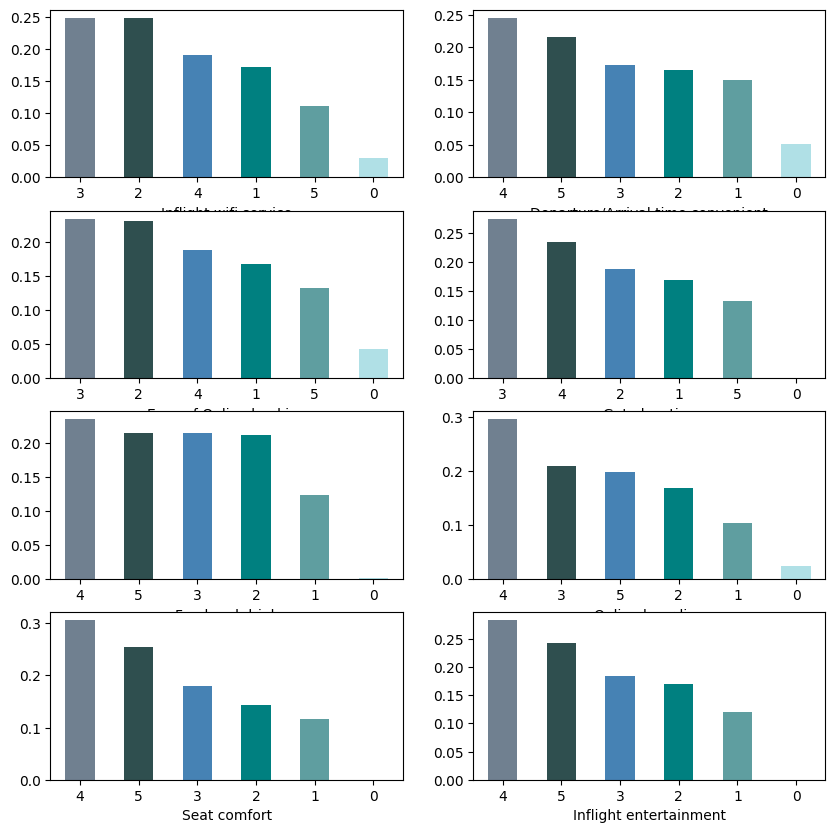

In [20]:
color_list = ['slategray','darkslategray','steelblue','teal','cadetblue','powderblue']
plt.figure(1,figsize=(10,10))

plt.subplot(421)
df['Inflight wifi service'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight wifi service')

plt.subplot(422)
df['Departure/Arrival time convenient'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list )
plt.xticks(rotation = 360)
plt.xlabel('Departure/Arrival time convenient')

plt.subplot(423)
df['Ease of Online booking'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Ease of Online booking')

plt.subplot(424)
df['Gate location'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Gate location')

plt.subplot(425)
df['Food and drink'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Food and drink')

plt.subplot(426)
df['Online boarding'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Online boarding')

plt.subplot(427)
df['Seat comfort'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Seat comfort')

plt.subplot(428)
df['Inflight entertainment'].value_counts(normalize=True,dropna=True).plot.bar(color = color_list)
plt.xticks(rotation = 360)
plt.xlabel('Inflight entertainment')

Variable independiente (categórica: ordinal)  

Aproximadamente el 25 % de los pasajeros obtuvieron una calificación de 3 y el 25 % de ellos obtuvieron una calificación de 2 para el servicio wifi a bordo  

El 24% de los pasajeros calificaron con 4 la hora de salida/llegada conveniente y el 21% de los pasajeros calificaron con 5 la misma calificación.  

Aproximadamente el 23% de los pasajeros califica 3 por la facilidad de reserva en línea y el 23% de ellos califica 2  

El 27,5% de los pasajeros califica con 3 la ubicación de la puerta de embarque.  

Para servicio de alimentos y bebidas 23% de calificaciones = 4  
 
Para el embarque en línea aproximadamente el 30% de los pasajeros dieron 4 calificaciones  

Para la comodidad del asiento, la mayoría de los pasajeros tienen un nivel satisfactorio de 4.  
  
Aproximadamente el 28 % de los pasajeros otorgó 4 calificaciones al entretenimiento a bordo


## QUE COMIENCEN LOS JUEGOS DEL HAMBRE

In [114]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: >

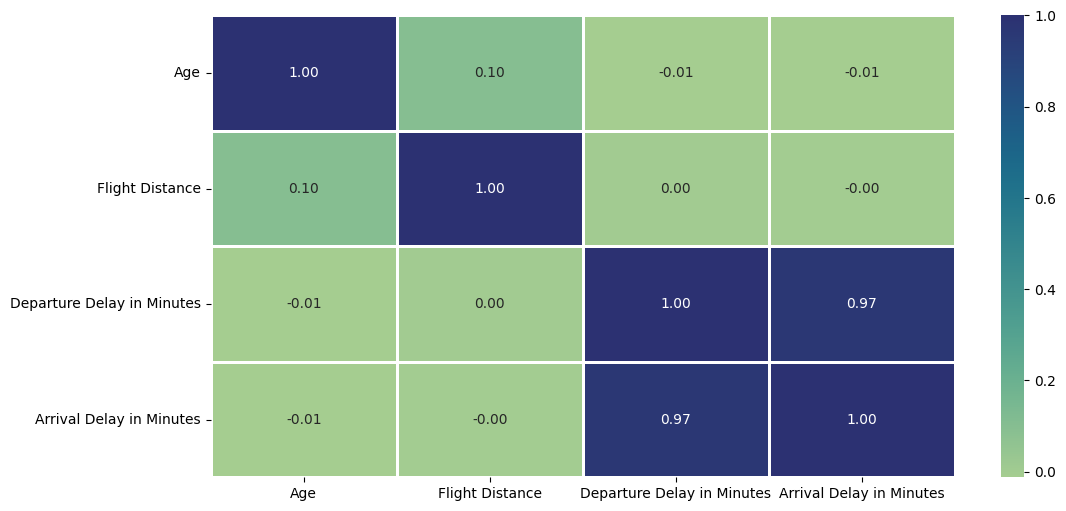

In [22]:
# Heatmap of the correlation between the features
plt.figure(figsize=(12, 6))
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
sns.heatmap(df[num].corr(),
            cmap = 'crest',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [129]:
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace=True)

In [130]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## ML

In [131]:
# Eliminamos las columnas que no vamos a usar
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [132]:
# Dividimos las columnas en categoricas y numericas
cat = ["Gender", "Customer Type", 'Type of Travel', 'Class', "Inflight wifi service", "Departure/Arrival time convenient", 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
#train_cat_col = df_train.select_dtypes(include = "object").columns
num = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]


In [133]:
# Define un mapeo de valores numéricos a las categorías
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}

# Aplica el mapeo a la columna 'satisfaction'
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)

# Asegúrate de que ahora los valores sean numéricos
df['satisfaction'] = df['satisfaction'].astype(int)

In [134]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [135]:
# usamos onehotencoder para las columnas categoricas
OH_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

#OH_enc.fit_transform(df[cat])
#OH_encoder = OneHotEncoder(sparse=False)


OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[cat]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df = df.drop(cat, axis=1)
df = pd.concat([df, OH_cols], axis=1)



#df[cat] = pd.DataFrame(OH_enc.fit_transform(df[cat]))
#OH_cols.index = df.index


# Get the unique values in each categorical column
#unique_values_per_column = [df[col].unique() for col in cat]

# Create column names for one-hot encoded features
#newcolumns = [
    #f"{col}{value}" for col, values in zip(cat, unique_values_per_column) for value in values
#]
#OH_cols.columns = newcolumns

#df = df.drop(cat, axis=1)
#df = pd.concat([df, OH_cols], axis=1)

/Users/gala/Desktop/Airlines/Aerolinea_equipo_4_Gala/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [136]:
df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,13,460,25,18.0,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,25,235,1,6.0,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26,1142,0,0.0,1,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25,562,11,9.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,61,214,0,0.0,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [137]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', OH_enc, cat)],remainder='passthrough')

In [138]:
# Escalamos las columnas numericas

scaler = StandardScaler()
df[num] = scaler.fit_transform(df[num])

In [139]:
df.head()


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,-1.745279,-0.731539,0.266393,0.070988,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.951360,-0.957184,-0.361375,-0.238223,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.387532,-0.392828,1,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.951360,-0.629246,-0.099805,-0.160920,0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.430397,-0.978244,-0.387532,-0.392828,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [140]:

# Train, validation, test sets split
features = df.drop('satisfaction', axis=1)
labels = df['satisfaction']

# 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# Modelos

# testing with some of the regression models
models = [ # RandomForestClassifier(max_depth=2, random_state=0),                                                                 
           GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=5, min_samples_split=4, n_estimators=50)
        #  LogisticRegression(),
        #  KNeighborsClassifier(),
        #  SVC(),
        #  XGBClassifier(),
        #  GaussianNB(),
        #  CatBoostClassifier(),
         ]


from pandas.io.parsers.readers import MANDATORY_DIALECT_ATTRS
#Cross validation
scores = {}

for i, model in enumerate(models):
  model.fit(X_train, y_train)
  model_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
  scores[f"model{i}"] = model_scores

for model_name, model_scores in scores.items():
  print (f"{model_name}:{model_scores}")
# np.random.seed(1)
# gbc = GradientBoostingClassifier()
# hyperparams = {
#     'n_estimators': [ 50, 100, 150], # 4 variants with diff num of trees
#     'max_depth': [2, 4, 5], # depth of each tree, Nonr means that model can choose by default
#     "min_samples_split": [4, 5],
#     "learning_rate": [0.09, 0.05, 0.25],
#     "loss": ['log_loss', 'exponential'],
#     'random_state': [0, 42]
# }
# cross_val = GridSearchCV(gbc, hyperparams, cv=5) #GridSearchCV module which used to adjust hyperparameters
# cross_val.fit(X_train, y_train.values.ravel())


#For evaluation and Define a prediction function for the given model
for mdl in models:
  y_pred = mdl.predict(X_val) #Define a prediction function for the given model
  accuracy = round(accuracy_score(y_val, y_pred), 3)
  precision = round(precision_score(y_val, y_pred), 3)
  recall = round(recall_score(y_val, y_pred), 3)

  print('Max Depth: {}  Estimators: {}  Accuracy: {}  Precision: {}  Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

model0:[0.95532922 0.95925896 0.96198268 0.95797241 0.95877446]
Max Depth: 5  Estimators: 50  Accuracy: 0.959  Precision: 0.967  Recall: 0.939


In [141]:

# testing 
for mdl in models:
  y_pred = mdl.predict(X_test) #Define a prediction function for the given model
  accuracy = round(accuracy_score(y_test, y_pred), 3)
  precision = round(precision_score(y_test, y_pred), 3)
  recall = round(recall_score(y_test, y_pred), 3)

  print('Max Depth: {}  Estimators: {}  Accuracy: {}  Precision: {}  Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 5  Estimators: 50  Accuracy: 0.96  Precision: 0.97  Recall: 0.938


In [142]:
# Calculate overfitting percentage
from sklearn.metrics import mean_absolute_error as mae

train_predictions = mdl.predict(X_train)
test_predictions = mdl.predict(X_test)


train_mae_train = mae(y_train, train_predictions)
test_mae_test = mae(y_test, test_predictions)
overfitting_percentage = ((test_mae_test - train_mae_train) / train_mae_train) * 100
print("Overfitting percentage: ", round(overfitting_percentage, 2), "%")

Overfitting percentage:  5.4 %


array([[11444,   267],
       [  566,  8504]])

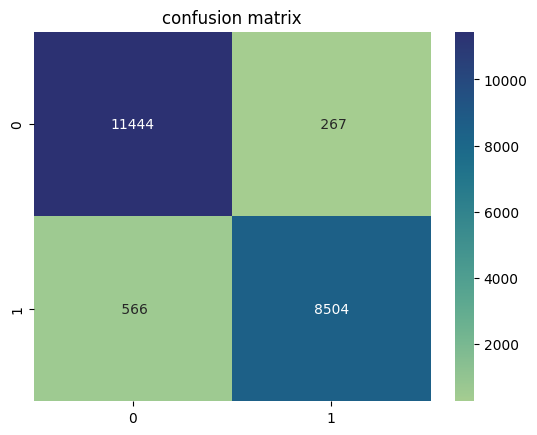

In [143]:
conf_mx = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
conf_mx

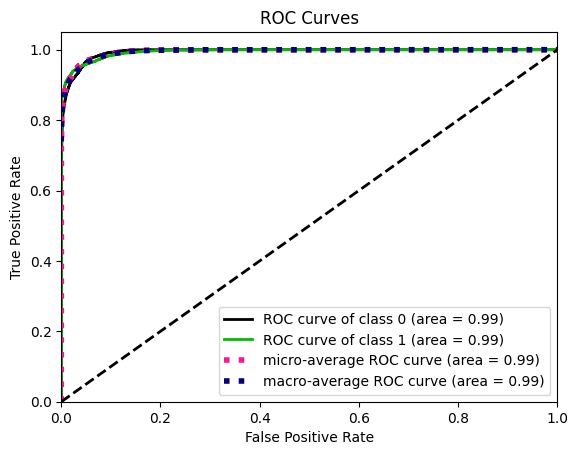

In [144]:
from sklearn.metrics import roc_curve, auc

y_pred = mdl.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()

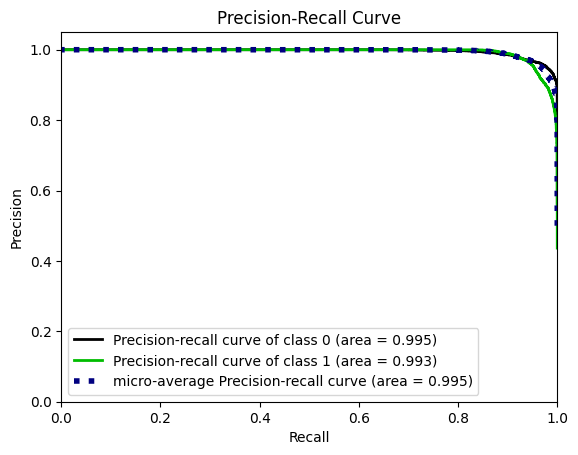

In [145]:
y_pred = mdl.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_pred)

plt.show()

In [146]:
#Setup Pickle
my_pipeline = {'preprocessor': preprocessor, 'scaler': scaler, 'model': mdl}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(my_pipeline, file)

In [147]:
with open('saved_steps.pkl', 'rb') as file:
    my_pipeline = pickle.load(file)


ok